In [1]:
# Module Importations
from collections import Counter
import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

# Print versioning information
print('seaborn version =', sns.__version__)
print('numpy version =', np.__version__)  
print('pandas version =', pd.__version__)

seaborn version = 0.10.0
numpy version = 1.19.4
pandas version = 1.1.4


In [2]:
# Custom Modules
from Source.data import load_data
from Source.features import data_munging
from Source.visualisation import figures_helper

In [3]:
# Constants
SAVE_FIGURES = True

In [4]:
# Load Dataset
df_plant1 = load_data.load_pickled_data("df_plant1_feat_eng.pkl")
df_plant2 = load_data.load_pickled_data("df_plant2_feat_eng.pkl")

Loading pickled dataframe started ...
Loading pickled dataframe complete ...
Loading pickled dataframe started ...
Loading pickled dataframe complete ...


# Identify Suspect Faulty Panels

An assumption is that panels will have zero output if they are in a fault condition (as opposed to a lower output). This assumption is supported by a working principle of inverters that they will stop producing an output if the input voltage from the connected solar panel falls too low (so partial outputs are unlikely).

Panels with larger numbers of zero-output instances may be faulty.

This can be visualised with a cut-off region.

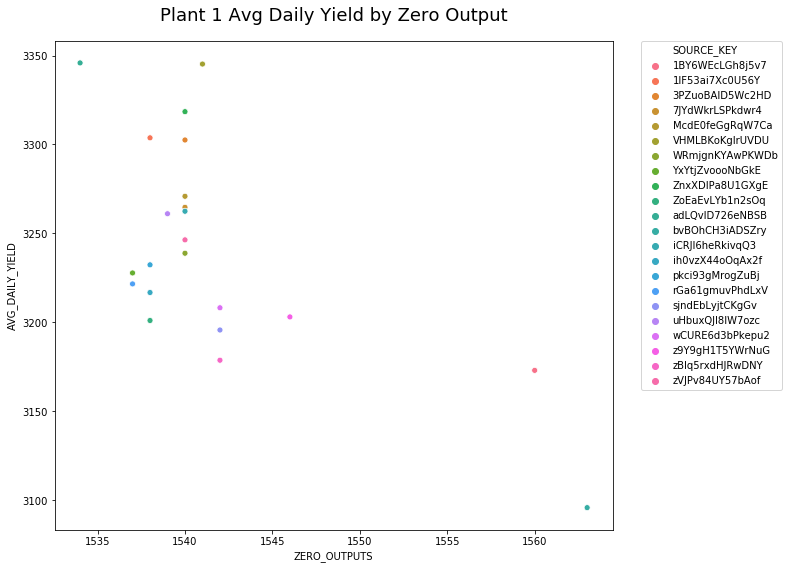

In [26]:

# Count number of zero instances per cell
zero_outputs = df_plant1[df_plant1['DC_POWER'] == 0].groupby('SOURCE_KEY')['DATE_TIME'].count().reset_index().rename(columns = {'DATE_TIME' : 'ZERO_OUTPUTS'})
zero_outputs.sort_values('ZERO_OUTPUTS', ascending = False)

# Create a grouping of source keys and avg daily yield
daily_yield = df_plant1.groupby(['SOURCE_KEY'])[['SOURCE_KEY', 'AVG_DAILY_YIELD']].mean().reset_index().sort_values('AVG_DAILY_YIELD', ascending = False)

# Merge zero instances and avg daily yield to identify cells with lots of downtime
plant1_efficiency = pd.merge(zero_outputs, daily_yield, how = 'inner', on = 'SOURCE_KEY')

plt.figure(figsize = (10, 9))
sns.scatterplot(data = plant1_efficiency, x = 'ZERO_OUTPUTS', y = 'AVG_DAILY_YIELD', hue = 'SOURCE_KEY')

# Style figure
plt.title('Plant 1 Avg Daily Yield by Zero Output', fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

# Add dividing line